In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

In [52]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [53]:
df["class"] = (df["class"] == "g").astype(int)

In [54]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

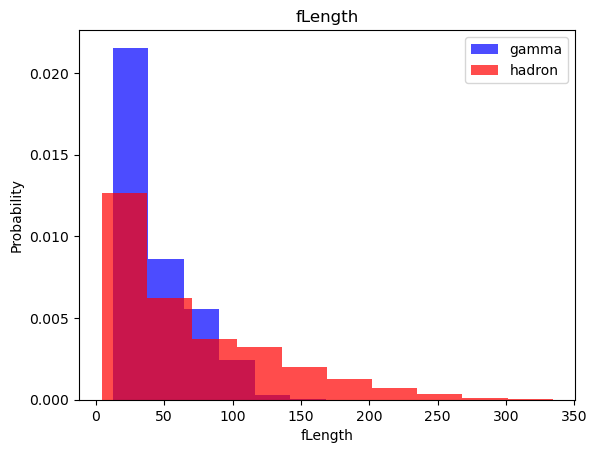

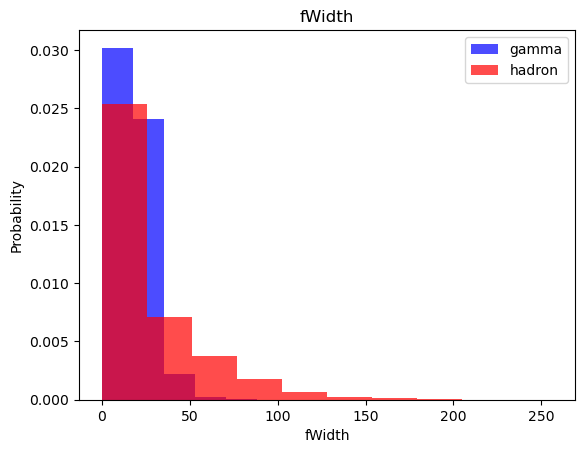

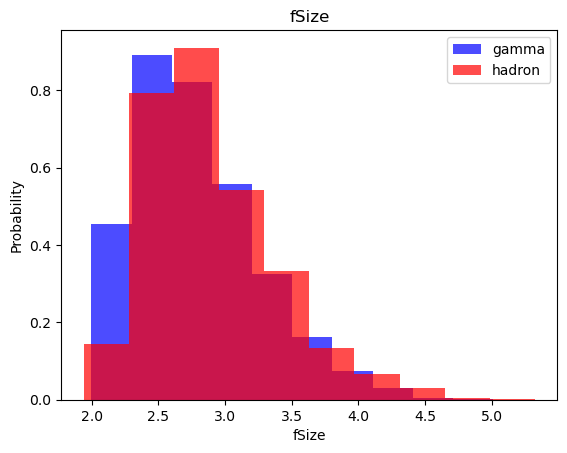

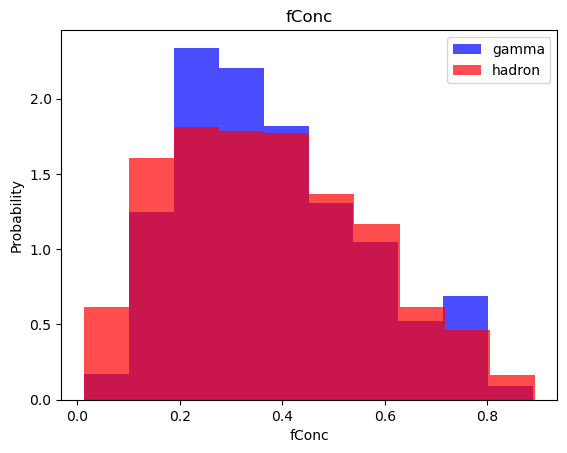

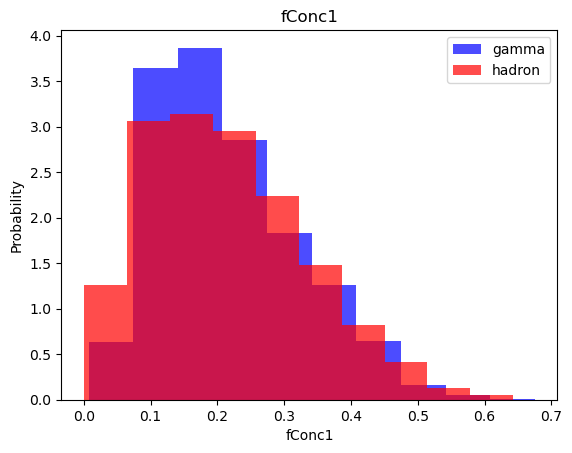

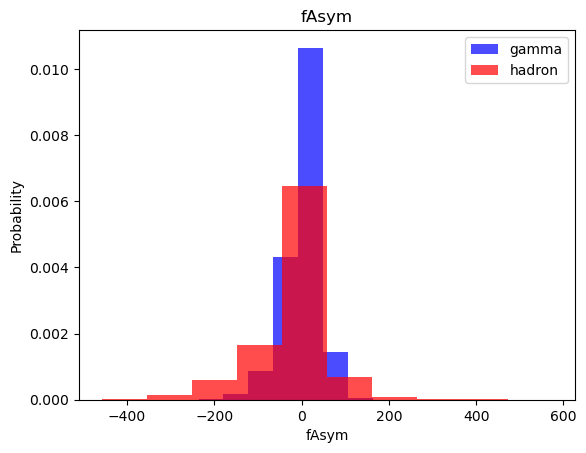

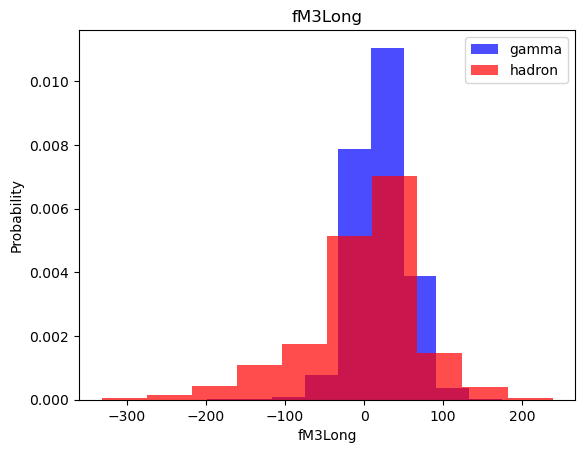

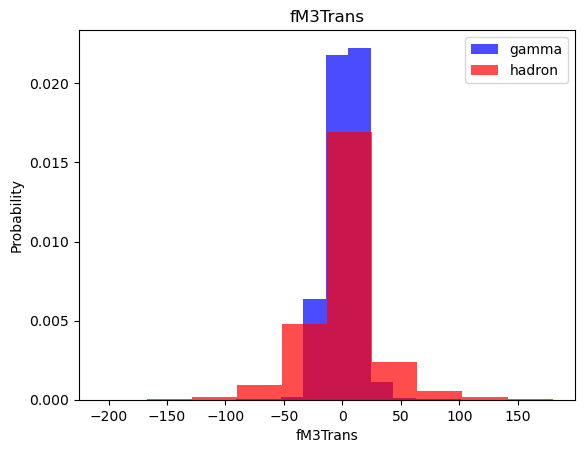

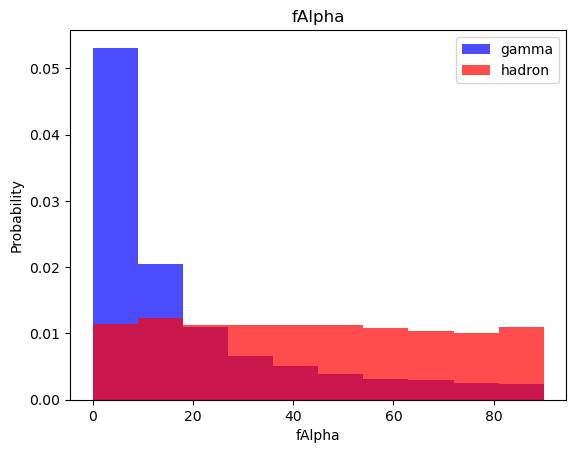

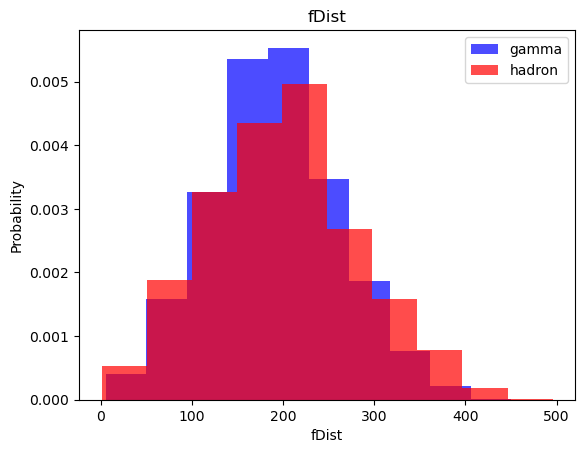

In [55]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation, test datasets

In [56]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [57]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [58]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# kNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [60]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
y_pred = knn_model.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1361
           1       0.85      0.86      0.86      2443

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [65]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.41      0.51      1361
           1       0.73      0.90      0.81      2443

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



# Log Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [68]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1361
           1       0.84      0.82      0.83      2443

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.78      3804



# SVM

In [69]:
from sklearn.svm import SVC

In [70]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [71]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1361
           1       0.89      0.91      0.90      2443

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804



# Neural Net

In [72]:
import tensorflow as tf

In [73]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [74]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32
Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - accuracy: 0.7978 - loss: 0.4324 - val_accuracy: 0.7358 - val_loss: 0.5380
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.8471 - loss: 0.3507 - val_accuracy: 0.7588 - val_loss: 0.4486
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.8555 - loss: 0.3390 - val_accuracy: 0.7611 - val_loss: 0.4718
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8557 - loss: 0.3343 - val_accuracy: 0.7348 - val_loss: 0.4736
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.8657 - loss: 0.3253 - val_accuracy: 0.7898 - val_loss: 0.3929
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.8606 - loss: 0.3230 - val_accuracy: 0.7517 - val_loss: 0.4857
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.8669 - loss: 0.3150 - val_accuracy: 0.7534 - val_loss: 0.4637
Epoch 8/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.8619 - loss: 0.3178 - val_

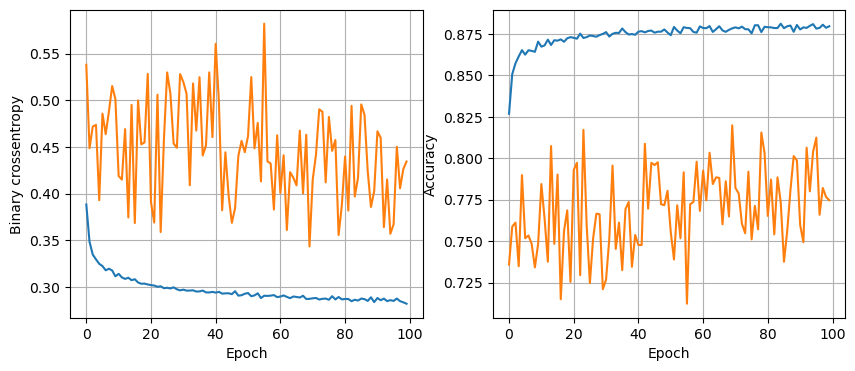

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.8717 - loss: 0.3059
16 nodes, dropout 0, lr 0.01, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7676 - loss: 0.4806 - val_accuracy: 0.7109 - val_loss: 0.6063
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.8451 - loss: 0.3660 - val_accuracy: 0.7945 - val_loss: 0.3988
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.8526 - loss: 0.3556 - val_accuracy: 0.7206 - val_loss: 0.5105
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8607 - loss: 0.3325 - val_accuracy: 0.7416 - val_loss: 0.4829
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.8640 - loss: 0.3245 - val_accuracy: 0.7483 - val_loss: 0.4545
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8644 - loss: 0.3188 - val_accuracy: 0.7325 - val_loss: 0.5093
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8667 - loss: 0.3173 - val_accu

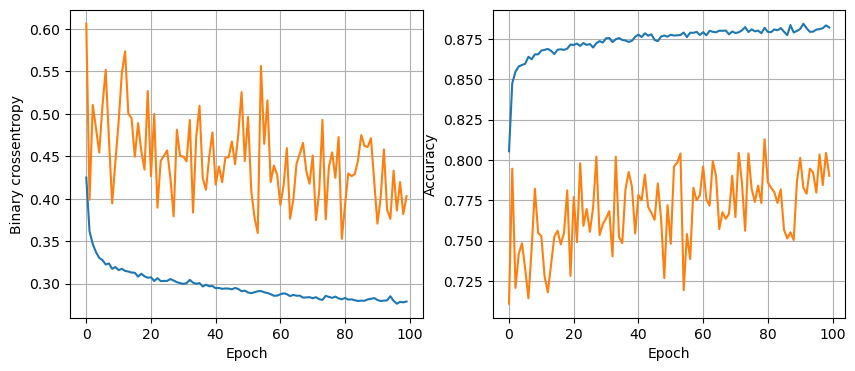

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.8716 - loss: 0.3104
16 nodes, dropout 0, lr 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7584 - loss: 0.5092 - val_accuracy: 0.7483 - val_loss: 0.4682
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8376 - loss: 0.3793 - val_accuracy: 0.6859 - val_loss: 0.6234
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8573 - loss: 0.3475 - val_accuracy: 0.7136 - val_loss: 0.5445
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8577 - loss: 0.3407 - val_accuracy: 0.7325 - val_loss: 0.5348
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8518 - loss: 0.3451 - val_accuracy: 0.7352 - val_loss: 0.5328
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8596 - loss: 0.3289 - val_accuracy: 0.7659 - val_loss: 0.4889
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8599 - loss: 0.3337 - val_accuracy: 0.7210 - val_lo

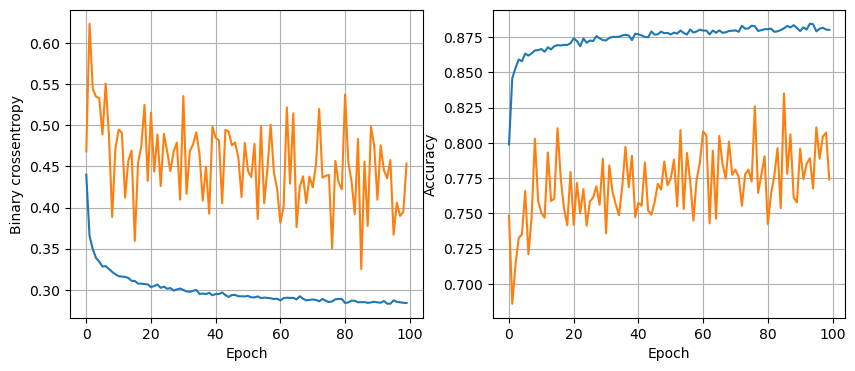

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.8736 - loss: 0.2943
16 nodes, dropout 0, lr 0.005, batch size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7873 - loss: 0.4708 - val_accuracy: 0.7308 - val_loss: 0.5510
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.8476 - loss: 0.3613 - val_accuracy: 0.8047 - val_loss: 0.3748
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.8533 - loss: 0.3460 - val_accuracy: 0.7500 - val_loss: 0.4874
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8617 - loss: 0.3351 - val_accuracy: 0.7331 - val_loss: 0.5494
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8602 - loss: 0.3384 - val_accuracy: 0.6839 - val_loss: 0.6628
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.8574 - loss: 0.3419 - val_accuracy: 0.7345 - val_loss: 0.5148
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.8618 - loss: 0.3283 - val_acc

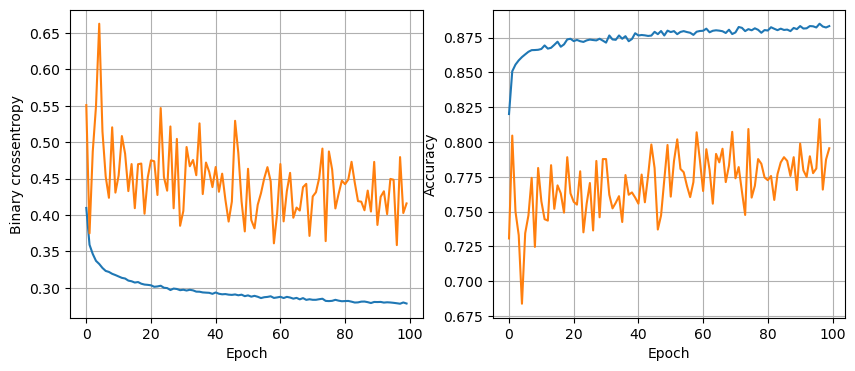

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.8677 - loss: 0.3139
16 nodes, dropout 0, lr 0.005, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7745 - loss: 0.4901 - val_accuracy: 0.6738 - val_loss: 0.6029
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8450 - loss: 0.3606 - val_accuracy: 0.6899 - val_loss: 0.6218
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.8462 - loss: 0.3623 - val_accuracy: 0.7348 - val_loss: 0.5065
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.8529 - loss: 0.3434 - val_accuracy: 0.7183 - val_loss: 0.5530
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8589 - loss: 0.3296 - val_accuracy: 0.7635 - val_loss: 0.4494
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8612 - loss: 0.3363 - val_accuracy: 0.6991 - val_loss: 0.6130
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8625 - loss: 0.3307 - val_acc

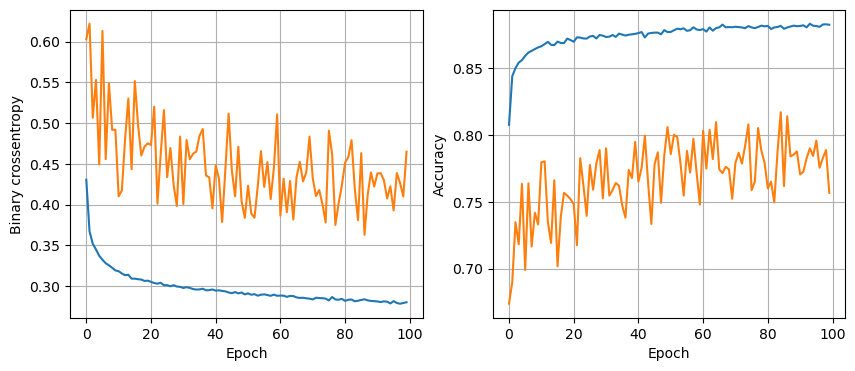

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.8726 - loss: 0.3071
16 nodes, dropout 0, lr 0.005, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7286 - loss: 0.5650 - val_accuracy: 0.6464 - val_loss: 0.6098
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8244 - loss: 0.3968 - val_accuracy: 0.7092 - val_loss: 0.5812
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8480 - loss: 0.3649 - val_accuracy: 0.6984 - val_loss: 0.5828
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8473 - loss: 0.3502 - val_accuracy: 0.7392 - val_loss: 0.5137
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8578 - loss: 0.3458 - val_accuracy: 0.7254 - val_loss: 0.5441
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8552 - loss: 0.3417 - val_accuracy: 0.7395 - val_loss: 0.5073
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8607 - loss: 0.3338 - val_accuracy: 0.7348 - val_l

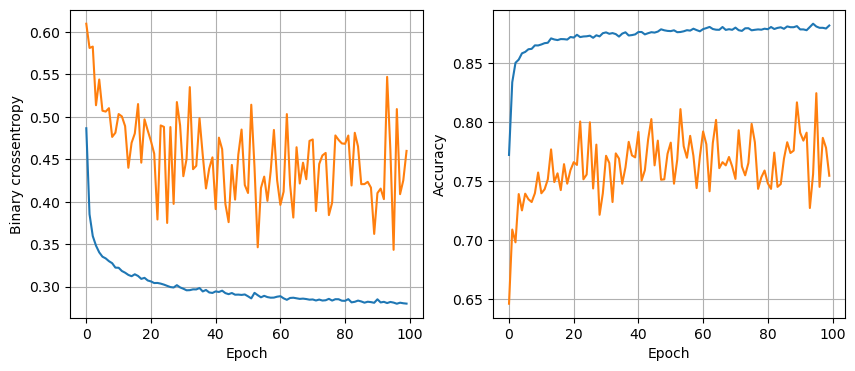

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.8770 - loss: 0.2982
16 nodes, dropout 0, lr 0.001, batch size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - accuracy: 0.7201 - loss: 0.5717 - val_accuracy: 0.6285 - val_loss: 0.6273
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.8210 - loss: 0.4020 - val_accuracy: 0.6913 - val_loss: 0.5723
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.8376 - loss: 0.3803 - val_accuracy: 0.7031 - val_loss: 0.5658
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.8500 - loss: 0.3650 - val_accuracy: 0.7321 - val_loss: 0.5219
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8510 - loss: 0.3525 - val_accuracy: 0.7335 - val_loss: 0.4997
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.8513 - loss: 0.3578 - val_accuracy: 0.7240 - val_loss: 0.5328
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.8566 - loss: 0.3460 - v

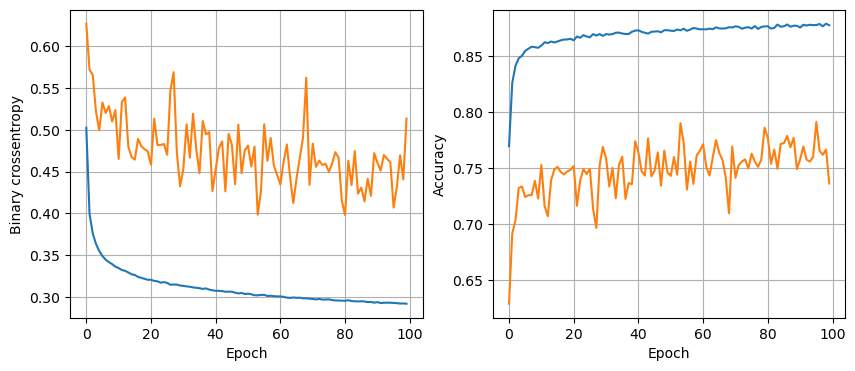

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.8834 - loss: 0.2955
16 nodes, dropout 0, lr 0.001, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6855 - loss: 0.6230 - val_accuracy: 0.6150 - val_loss: 0.6419
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.7945 - loss: 0.4463 - val_accuracy: 0.6471 - val_loss: 0.6074
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8141 - loss: 0.4134 - val_accuracy: 0.6522 - val_loss: 0.6093
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8254 - loss: 0.3914 - val_accuracy: 0.6953 - val_loss: 0.5556
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8301 - loss: 0.3893 - val_accuracy: 0.6758 - val_loss: 0.5916
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.8369 - loss: 0.3732 - val_accuracy: 0.7200 - val_loss: 0.5369
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.8446 - loss: 0.3667 - val_acc

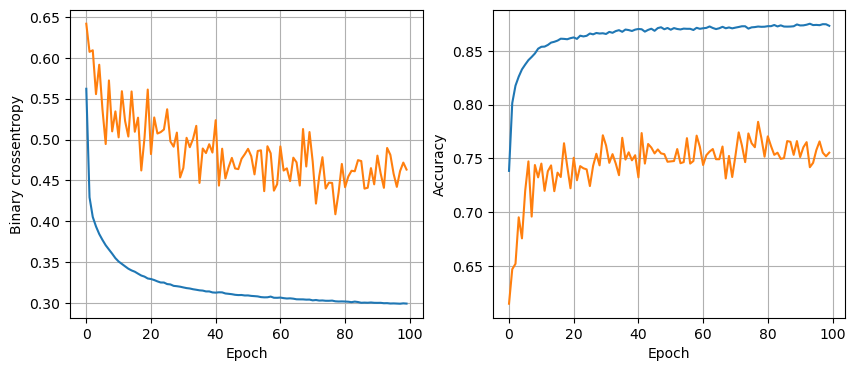

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8727 - loss: 0.3078
16 nodes, dropout 0, lr 0.001, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6276 - loss: 0.7339 - val_accuracy: 0.2362 - val_loss: 0.8601
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7340 - loss: 0.5617 - val_accuracy: 0.5756 - val_loss: 0.7248
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7958 - loss: 0.4608 - val_accuracy: 0.6579 - val_loss: 0.6240
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8128 - loss: 0.4214 - val_accuracy: 0.6640 - val_loss: 0.6235
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8160 - loss: 0.4057 - val_accuracy: 0.6724 - val_loss: 0.6015
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8303 - loss: 0.3878 - val_accuracy: 0.7045 - val_loss: 0.5460
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8361 - loss: 0.3883 - val_accuracy: 0.6690 - val_los

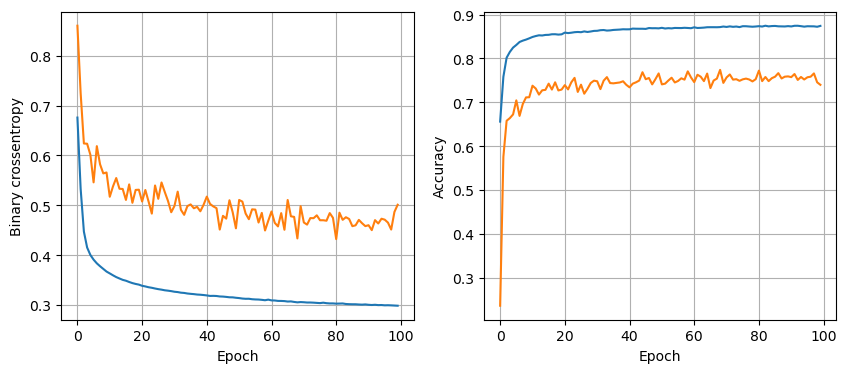

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.8677 - loss: 0.3048
16 nodes, dropout 0.2, lr 0.01, batch size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7512 - loss: 0.4999 - val_accuracy: 0.7176 - val_loss: 0.5006
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8346 - loss: 0.3972 - val_accuracy: 0.6795 - val_loss: 0.5584
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.8365 - loss: 0.3810 - val_accuracy: 0.6913 - val_loss: 0.5251
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.8453 - loss: 0.3770 - val_accuracy: 0.6410 - val_loss: 0.6418
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.8457 - loss: 0.3681 - val_accuracy: 0.7075 - val_loss: 0.5421
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8486 - loss: 0.3611 - val_accuracy: 0.7055 - val_loss: 0.5267
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.8461 - loss: 0.3624 - val_ac

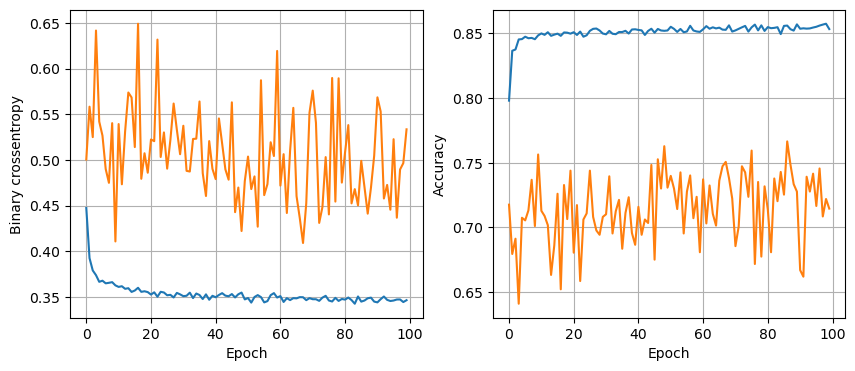

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.8638 - loss: 0.3120
16 nodes, dropout 0.2, lr 0.01, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7479 - loss: 0.5175 - val_accuracy: 0.7163 - val_loss: 0.5415
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8283 - loss: 0.4035 - val_accuracy: 0.7213 - val_loss: 0.5440
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.8313 - loss: 0.3897 - val_accuracy: 0.7227 - val_loss: 0.4926
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8345 - loss: 0.3919 - val_accuracy: 0.7105 - val_loss: 0.5391
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8404 - loss: 0.3725 - val_accuracy: 0.7382 - val_loss: 0.4847
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.8474 - loss: 0.3688 - val_accuracy: 0.7257 - val_loss: 0.5101
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.8434 - loss: 0.3635 - val_ac

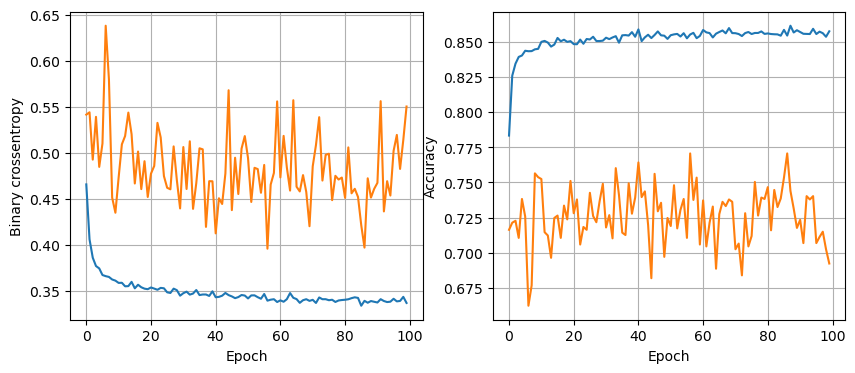

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.8705 - loss: 0.3062
16 nodes, dropout 0.2, lr 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7263 - loss: 0.5708 - val_accuracy: 0.6123 - val_loss: 0.5927
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8135 - loss: 0.4216 - val_accuracy: 0.6829 - val_loss: 0.5836
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8252 - loss: 0.4018 - val_accuracy: 0.6991 - val_loss: 0.6007
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8377 - loss: 0.3812 - val_accuracy: 0.7648 - val_loss: 0.4666
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8354 - loss: 0.3779 - val_accuracy: 0.7443 - val_loss: 0.4776
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8379 - loss: 0.3732 - val_accuracy: 0.7358 - val_loss: 0.5060
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8480 - loss: 0.3594 - val_accuracy: 0.7807 - val_

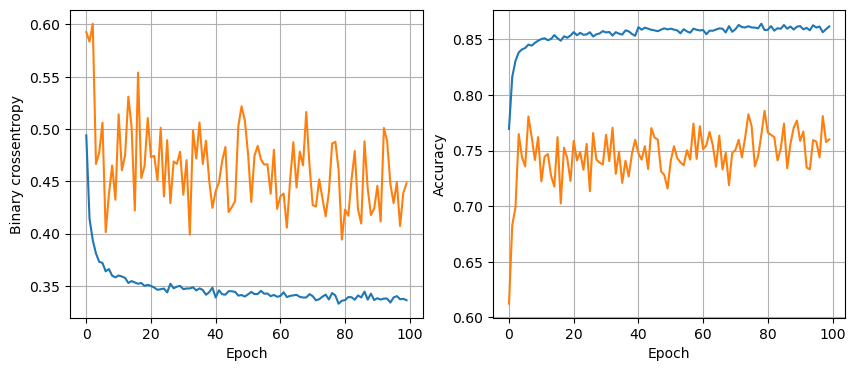

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.8673 - loss: 0.3031
16 nodes, dropout 0.2, lr 0.005, batch size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.7388 - loss: 0.5210 - val_accuracy: 0.7011 - val_loss: 0.5374
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.8218 - loss: 0.4127 - val_accuracy: 0.7203 - val_loss: 0.5612
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.8343 - loss: 0.3852 - val_accuracy: 0.7088 - val_loss: 0.5578
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.8438 - loss: 0.3688 - val_accuracy: 0.7314 - val_loss: 0.4984
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.8364 - loss: 0.3779 - val_accuracy: 0.6964 - val_loss: 0.5607
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.8437 - loss: 0.3695 - val_accuracy: 0.7122 - val_loss: 0.5299
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.8482 - loss: 0.3582 -

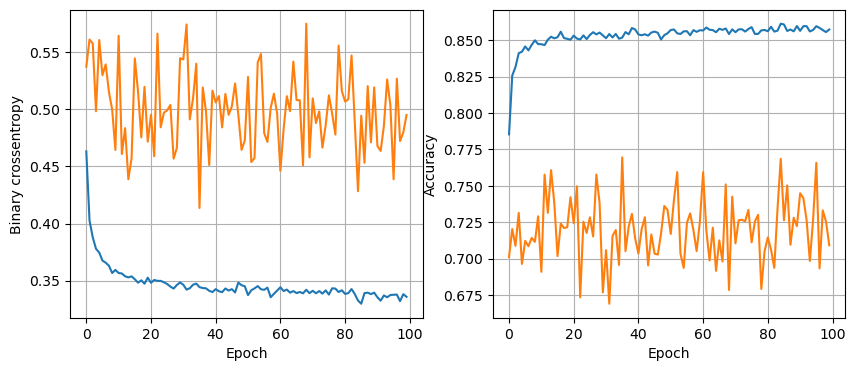

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8689 - loss: 0.3067
16 nodes, dropout 0.2, lr 0.005, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7228 - loss: 0.5384 - val_accuracy: 0.6883 - val_loss: 0.5795
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8050 - loss: 0.4289 - val_accuracy: 0.6923 - val_loss: 0.5723
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8324 - loss: 0.3868 - val_accuracy: 0.6832 - val_loss: 0.5680
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.8401 - loss: 0.3752 - val_accuracy: 0.7119 - val_loss: 0.5140
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.8418 - loss: 0.3723 - val_accuracy: 0.7176 - val_loss: 0.5334
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.8509 - loss: 0.3589 - val_accuracy: 0.7547 - val_loss: 0.4492
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.8490 - loss: 0.3617 - val

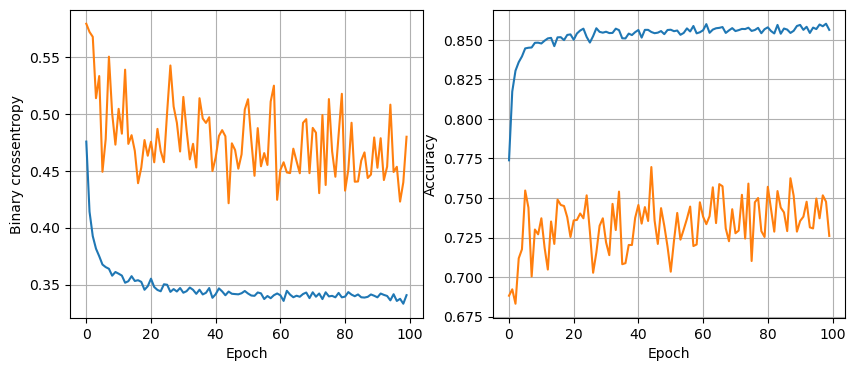

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.8744 - loss: 0.3066
16 nodes, dropout 0.2, lr 0.005, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7138 - loss: 0.5830 - val_accuracy: 0.5999 - val_loss: 0.6558
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7928 - loss: 0.4436 - val_accuracy: 0.6714 - val_loss: 0.6122
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8166 - loss: 0.4209 - val_accuracy: 0.7142 - val_loss: 0.5318
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8299 - loss: 0.3913 - val_accuracy: 0.6630 - val_loss: 0.6249
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.8332 - loss: 0.3929 - val_accuracy: 0.7412 - val_loss: 0.4752
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.8412 - loss: 0.3790 - val_accuracy: 0.7149 - val_loss: 0.5131
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.8479 - loss: 0.3671 - val_accuracy: 0.7480

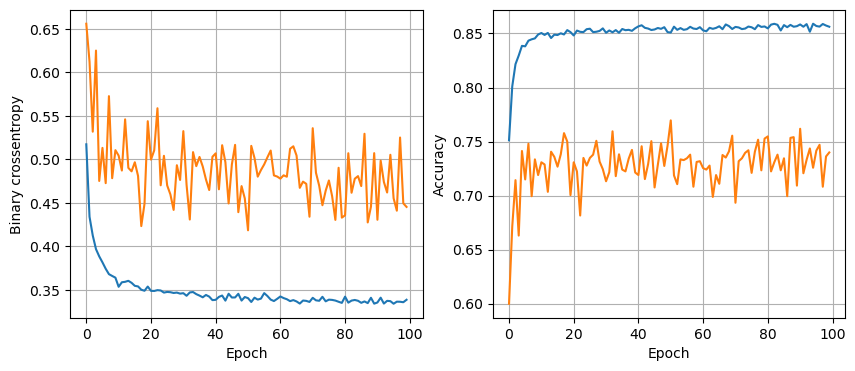

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.8685 - loss: 0.3105
16 nodes, dropout 0.2, lr 0.001, batch size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6868 - loss: 0.6293 - val_accuracy: 0.6245 - val_loss: 0.6589
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.7717 - loss: 0.4813 - val_accuracy: 0.6549 - val_loss: 0.5942
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.7963 - loss: 0.4447 - val_accuracy: 0.6488 - val_loss: 0.5946
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.8098 - loss: 0.4271 - val_accuracy: 0.6663 - val_loss: 0.5755
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.8198 - loss: 0.4187 - val_accuracy: 0.6835 - val_loss: 0.5409
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.8227 - loss: 0.4117 - val_accuracy: 0.6812 - val_loss: 0.5652
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.8190 - loss: 0.4085 - v

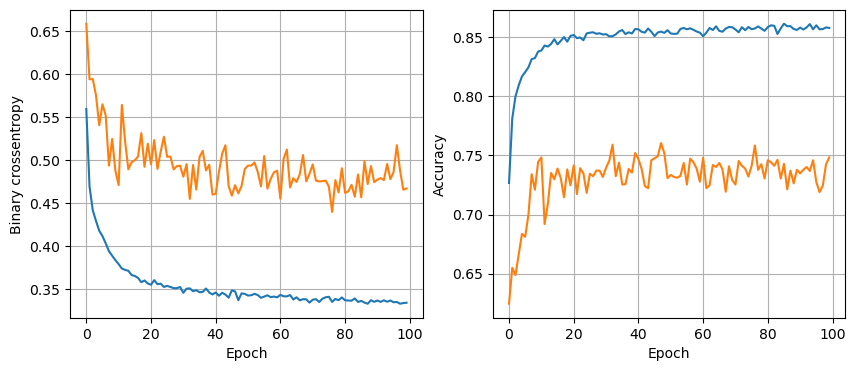

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8676 - loss: 0.3005
16 nodes, dropout 0.2, lr 0.001, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5710 - loss: 0.7210 - val_accuracy: 0.5557 - val_loss: 0.6831
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.7623 - loss: 0.5033 - val_accuracy: 0.6282 - val_loss: 0.6664
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.7876 - loss: 0.4594 - val_accuracy: 0.6522 - val_loss: 0.6220
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.7961 - loss: 0.4501 - val_accuracy: 0.6717 - val_loss: 0.5976
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.8109 - loss: 0.4249 - val_accuracy: 0.6569 - val_loss: 0.6193
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8133 - loss: 0.4197 - val_accuracy: 0.6872 - val_loss: 0.5772
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8132 - loss: 0.4292 - val_a

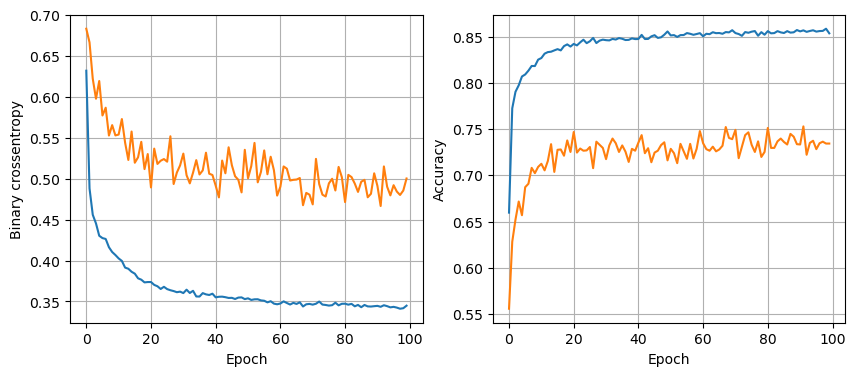

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.8684 - loss: 0.3072
16 nodes, dropout 0.2, lr 0.001, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4283 - loss: 0.7695 - val_accuracy: 0.6660 - val_loss: 0.5509
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7282 - loss: 0.5959 - val_accuracy: 0.5712 - val_loss: 0.6142
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7723 - loss: 0.5259 - val_accuracy: 0.5874 - val_loss: 0.6316
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7748 - loss: 0.4970 - val_accuracy: 0.5958 - val_loss: 0.6387
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7883 - loss: 0.4668 - val_accuracy: 0.6177 - val_loss: 0.6257
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.7882 - loss: 0.4587 - val_accuracy: 0.6319 - val_loss: 0.6208
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8020 - loss: 0.4444 - val_accuracy: 0.6400 - v

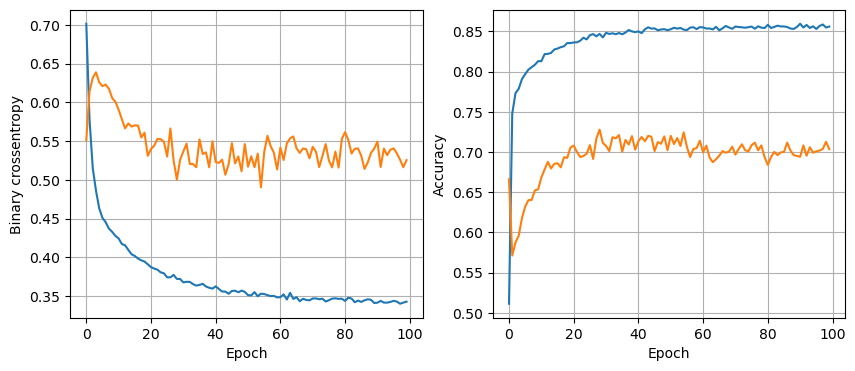

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.8724 - loss: 0.3038
32 nodes, dropout 0, lr 0.01, batch size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8056 - loss: 0.4294 - val_accuracy: 0.7183 - val_loss: 0.5746
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.8473 - loss: 0.3502 - val_accuracy: 0.7618 - val_loss: 0.4601
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.8541 - loss: 0.3371 - val_accuracy: 0.7814 - val_loss: 0.3878
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.8565 - loss: 0.3329 - val_accuracy: 0.7190 - val_loss: 0.5417
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.8638 - loss: 0.3207 - val_accuracy: 0.7281 - val_loss: 0.4646
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.8642 - loss: 0.3186 - val_accuracy: 0.6957 - val_loss: 0.5582
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.8754 - loss: 0.3038 - val_

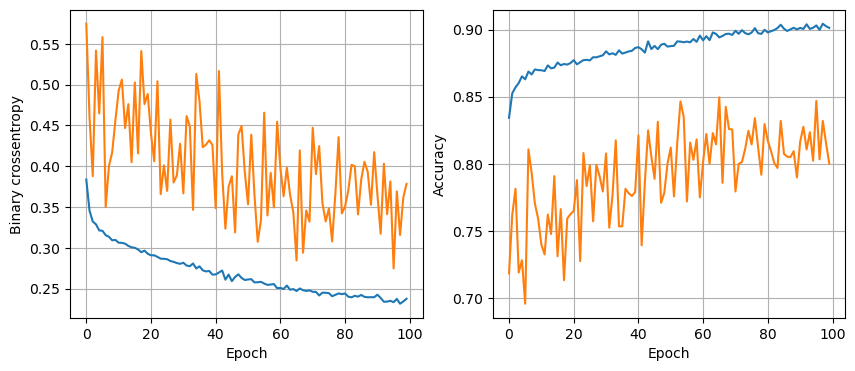

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8674 - loss: 0.3415
32 nodes, dropout 0, lr 0.01, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7777 - loss: 0.4530 - val_accuracy: 0.7314 - val_loss: 0.5305
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.8455 - loss: 0.3597 - val_accuracy: 0.6684 - val_loss: 0.6072
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8598 - loss: 0.3345 - val_accuracy: 0.7325 - val_loss: 0.5176
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.8647 - loss: 0.3264 - val_accuracy: 0.7780 - val_loss: 0.4162
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8600 - loss: 0.3315 - val_accuracy: 0.7972 - val_loss: 0.3685
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.8649 - loss: 0.3204 - val_accuracy: 0.7578 - val_loss: 0.4905
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.8671 - loss: 0.3240 - val_accu

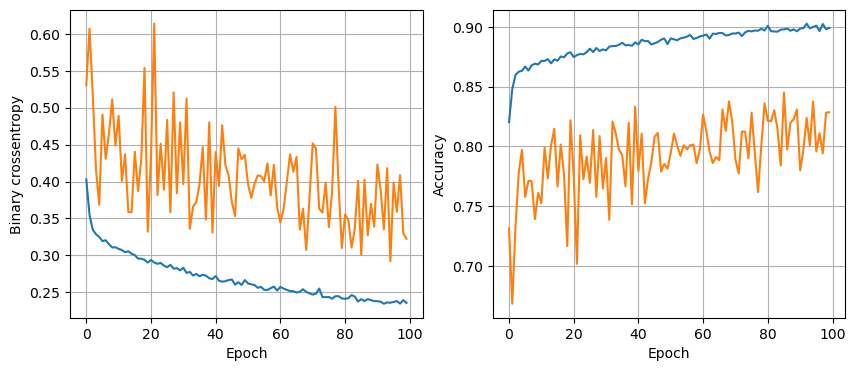

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.8592 - loss: 0.3614
32 nodes, dropout 0, lr 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7813 - loss: 0.4680 - val_accuracy: 0.6157 - val_loss: 0.7433
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8512 - loss: 0.3583 - val_accuracy: 0.7227 - val_loss: 0.5426
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8541 - loss: 0.3435 - val_accuracy: 0.7503 - val_loss: 0.4643
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.8620 - loss: 0.3305 - val_accuracy: 0.7527 - val_loss: 0.4515
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.8665 - loss: 0.3185 - val_accuracy: 0.7419 - val_loss: 0.4747
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.8693 - loss: 0.3132 - val_accuracy: 0.7436 - val_loss: 0.4614
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.8691 - loss: 0.3106 - val_accuracy: 0.755

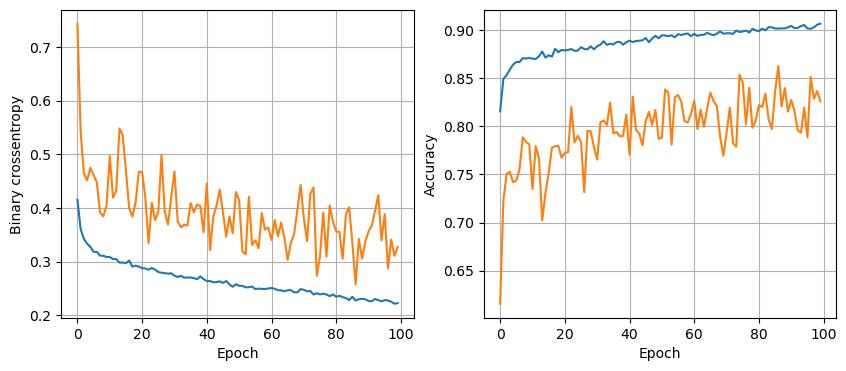

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.8587 - loss: 0.3508
32 nodes, dropout 0, lr 0.005, batch size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.7900 - loss: 0.4559 - val_accuracy: 0.6910 - val_loss: 0.6176
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.8529 - loss: 0.3440 - val_accuracy: 0.6845 - val_loss: 0.6240
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.8648 - loss: 0.3200 - val_accuracy: 0.7419 - val_loss: 0.4868
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.8638 - loss: 0.3275 - val_accuracy: 0.7628 - val_loss: 0.4510
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.8719 - loss: 0.3144 - val_accuracy: 0.7648 - val_loss: 0.4359
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.8701 - loss: 0.3165 - val_accuracy: 0.6960 - val_loss: 0.5784
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.8616 - loss: 0.3264 - v

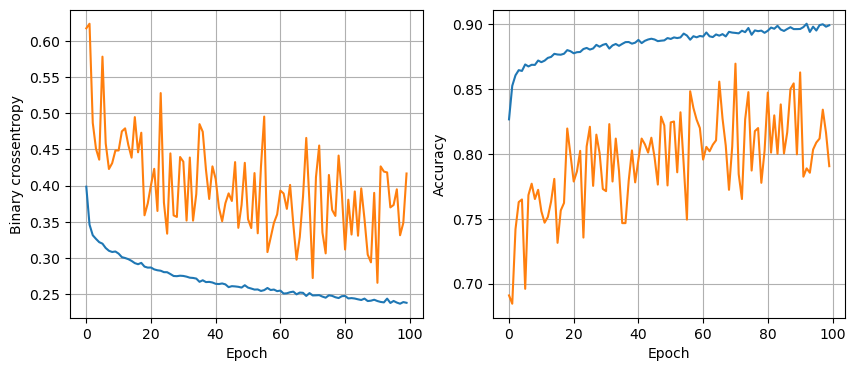

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.8705 - loss: 0.3388
32 nodes, dropout 0, lr 0.005, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7689 - loss: 0.4743 - val_accuracy: 0.7598 - val_loss: 0.4691
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.8483 - loss: 0.3572 - val_accuracy: 0.7092 - val_loss: 0.5611
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.8582 - loss: 0.3331 - val_accuracy: 0.7379 - val_loss: 0.5079
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.8542 - loss: 0.3341 - val_accuracy: 0.7068 - val_loss: 0.5801
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8603 - loss: 0.3305 - val_accuracy: 0.7679 - val_loss: 0.4624
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8682 - loss: 0.3153 - val_accuracy: 0.7274 - val_loss: 0.5091
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.8676 - loss: 0.3200 - val

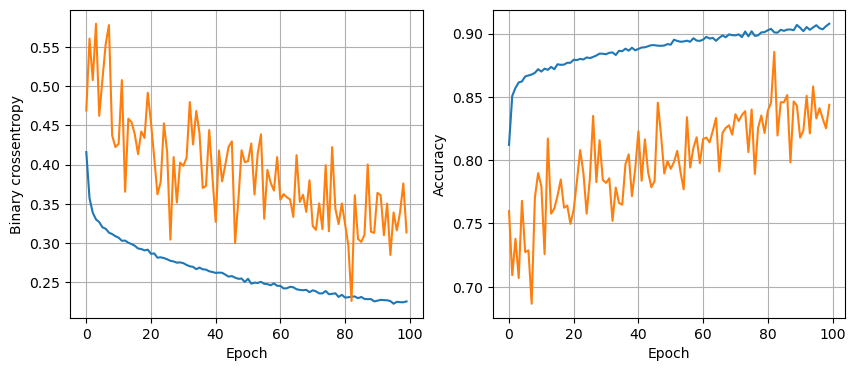

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.8638 - loss: 0.3382
32 nodes, dropout 0, lr 0.005, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7419 - loss: 0.5065 - val_accuracy: 0.7001 - val_loss: 0.5768
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8492 - loss: 0.3593 - val_accuracy: 0.6869 - val_loss: 0.6100
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.8551 - loss: 0.3502 - val_accuracy: 0.6916 - val_loss: 0.5746
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.8562 - loss: 0.3352 - val_accuracy: 0.7368 - val_loss: 0.4884
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.8648 - loss: 0.3260 - val_accuracy: 0.7399 - val_loss: 0.4968
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.8645 - loss: 0.3204 - val_accuracy: 0.7419 - val_loss: 0.4870
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.8607 - loss: 0.3259 - val_accuracy: 0.

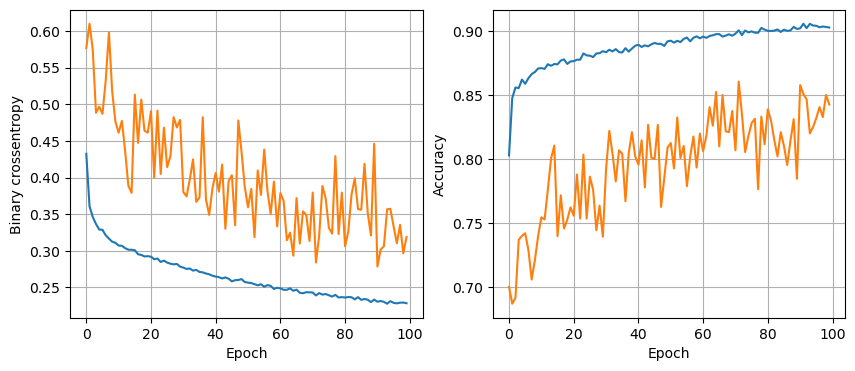

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.8649 - loss: 0.3225
32 nodes, dropout 0, lr 0.001, batch size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.7486 - loss: 0.5256 - val_accuracy: 0.6603 - val_loss: 0.5827
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.8425 - loss: 0.3718 - val_accuracy: 0.7662 - val_loss: 0.4452
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.8457 - loss: 0.3648 - val_accuracy: 0.7412 - val_loss: 0.4915
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8534 - loss: 0.3489 - val_accuracy: 0.7399 - val_loss: 0.5015
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.8598 - loss: 0.3392 - val_accuracy: 0.7325 - val_loss: 0.5225
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.8628 - loss: 0.3284 - val_accuracy: 0.7389 - val_loss: 0.5013
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.8599 - loss: 0.3331 - v

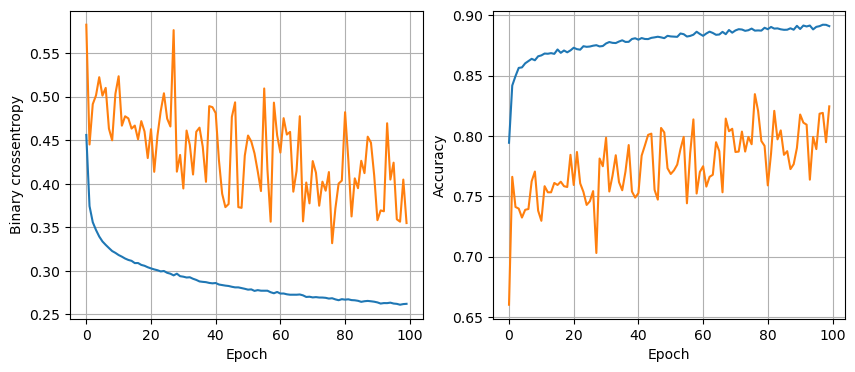

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.8632 - loss: 0.3178
32 nodes, dropout 0, lr 0.001, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7086 - loss: 0.5899 - val_accuracy: 0.6258 - val_loss: 0.6268
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8099 - loss: 0.4174 - val_accuracy: 0.6903 - val_loss: 0.5565
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.8394 - loss: 0.3816 - val_accuracy: 0.7206 - val_loss: 0.5438
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.8436 - loss: 0.3653 - val_accuracy: 0.7365 - val_loss: 0.5123
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.8525 - loss: 0.3513 - val_accuracy: 0.7443 - val_loss: 0.4910
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.8602 - loss: 0.3371 - val_accuracy: 0.7449 - val_loss: 0.4945
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.8538 - loss: 0.3425 - val_a

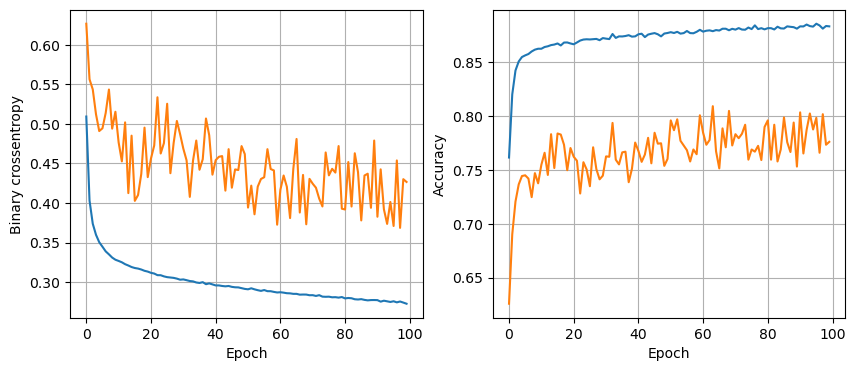

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.8783 - loss: 0.3059
32 nodes, dropout 0, lr 0.001, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7195 - loss: 0.5583 - val_accuracy: 0.6299 - val_loss: 0.6731
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8191 - loss: 0.4093 - val_accuracy: 0.6798 - val_loss: 0.5907
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8432 - loss: 0.3817 - val_accuracy: 0.7237 - val_loss: 0.5351
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8449 - loss: 0.3689 - val_accuracy: 0.7206 - val_loss: 0.5361
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8467 - loss: 0.3670 - val_accuracy: 0.7433 - val_loss: 0.5164
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8541 - loss: 0.3487 - val_accuracy: 0.7321 - val_loss: 0.5241
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8515 - loss: 0.3492 - val_accuracy: 0.7331 - val_l

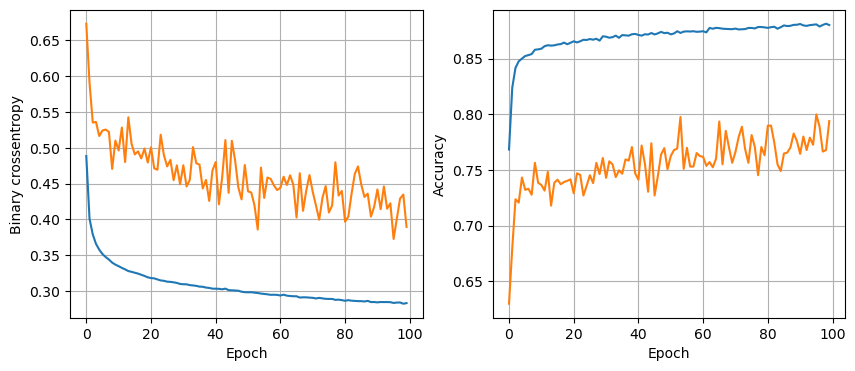

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8709 - loss: 0.3094
32 nodes, dropout 0.2, lr 0.01, batch size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7823 - loss: 0.4667 - val_accuracy: 0.6738 - val_loss: 0.5597
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.8446 - loss: 0.3736 - val_accuracy: 0.6309 - val_loss: 0.6779
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.8478 - loss: 0.3680 - val_accuracy: 0.7601 - val_loss: 0.4578
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.8482 - loss: 0.3629 - val_accuracy: 0.7088 - val_loss: 0.5441
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.8493 - loss: 0.3563 - val_accuracy: 0.7237 - val_loss: 0.4534
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.8478 - loss: 0.3571 - val_accuracy: 0.7483 - val_loss: 0.4709
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.8520 - loss: 0.3438 - va

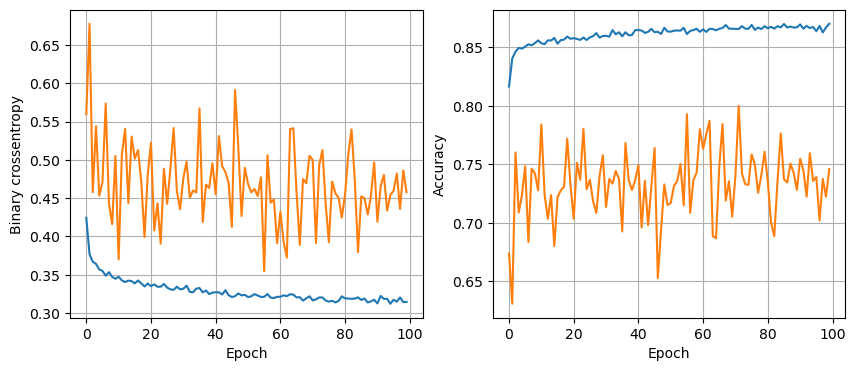

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.8847 - loss: 0.2900
32 nodes, dropout 0.2, lr 0.01, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7552 - loss: 0.4902 - val_accuracy: 0.6572 - val_loss: 0.6515
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.8339 - loss: 0.3916 - val_accuracy: 0.7129 - val_loss: 0.5228
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8415 - loss: 0.3744 - val_accuracy: 0.7777 - val_loss: 0.4456
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.8405 - loss: 0.3669 - val_accuracy: 0.7230 - val_loss: 0.4513
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.8503 - loss: 0.3504 - val_accuracy: 0.7203 - val_loss: 0.4512
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8538 - loss: 0.3510 - val_accuracy: 0.7328 - val_loss: 0.5666
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.8453 - loss: 0.3552 - val_

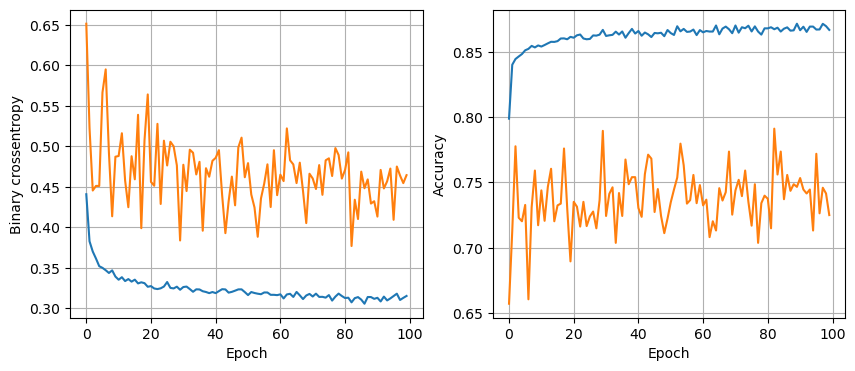

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8766 - loss: 0.2945
32 nodes, dropout 0.2, lr 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7661 - loss: 0.4912 - val_accuracy: 0.7325 - val_loss: 0.4718
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8364 - loss: 0.3863 - val_accuracy: 0.7011 - val_loss: 0.5469
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8442 - loss: 0.3724 - val_accuracy: 0.7314 - val_loss: 0.5460
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8561 - loss: 0.3468 - val_accuracy: 0.6980 - val_loss: 0.5283
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8520 - loss: 0.3492 - val_accuracy: 0.7085 - val_loss: 0.5599
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8506 - loss: 0.3498 - val_accuracy: 0.6862 - val_loss: 0.5761
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8546 - loss: 0.3483 - val_accuracy: 0.6775 - val_lo

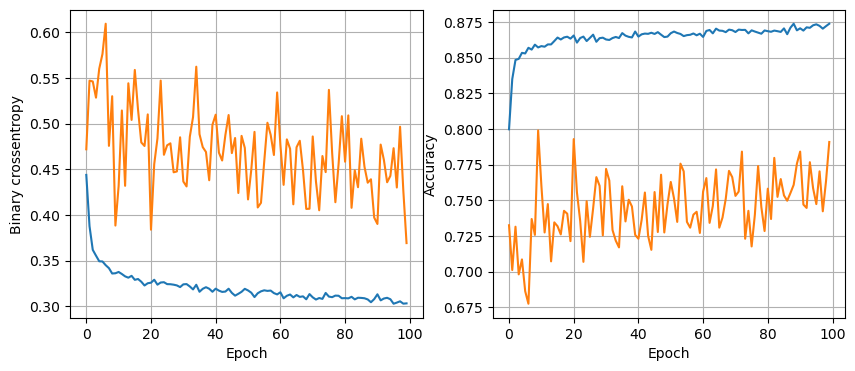

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.8656 - loss: 0.3076
32 nodes, dropout 0.2, lr 0.005, batch size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - accuracy: 0.7847 - loss: 0.4741 - val_accuracy: 0.7227 - val_loss: 0.5046
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8263 - loss: 0.3940 - val_accuracy: 0.7099 - val_loss: 0.5270
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.8345 - loss: 0.3648 - val_accuracy: 0.6886 - val_loss: 0.5791
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.8512 - loss: 0.3518 - val_accuracy: 0.7193 - val_loss: 0.5253
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.8536 - loss: 0.3518 - val_accuracy: 0.6781 - val_loss: 0.5766
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.8445 - loss: 0.3605 - val_accuracy: 0.7794 - val_loss: 0.4375
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.8552 - loss: 0.3355 - v

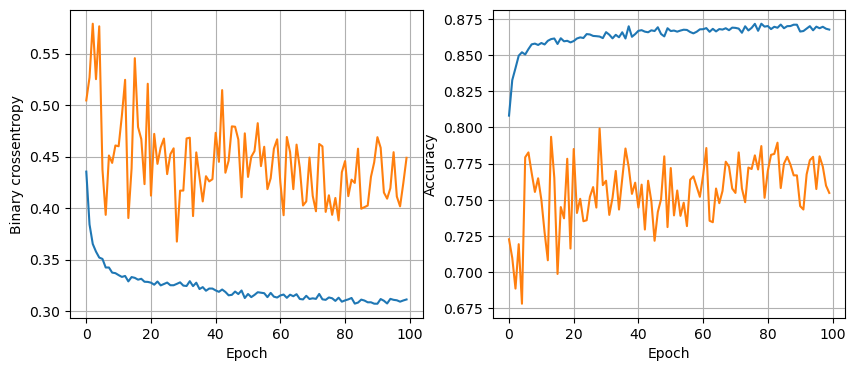

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.8771 - loss: 0.3031
32 nodes, dropout 0.2, lr 0.005, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7625 - loss: 0.5029 - val_accuracy: 0.6420 - val_loss: 0.6672
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.8296 - loss: 0.3968 - val_accuracy: 0.6893 - val_loss: 0.5345
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.8392 - loss: 0.3760 - val_accuracy: 0.7217 - val_loss: 0.4900
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8476 - loss: 0.3580 - val_accuracy: 0.7061 - val_loss: 0.5400
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.8588 - loss: 0.3408 - val_accuracy: 0.7321 - val_loss: 0.4794
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.8534 - loss: 0.3457 - val_accuracy: 0.7311 - val_loss: 0.4377
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.8593 - loss: 0.3395 - v

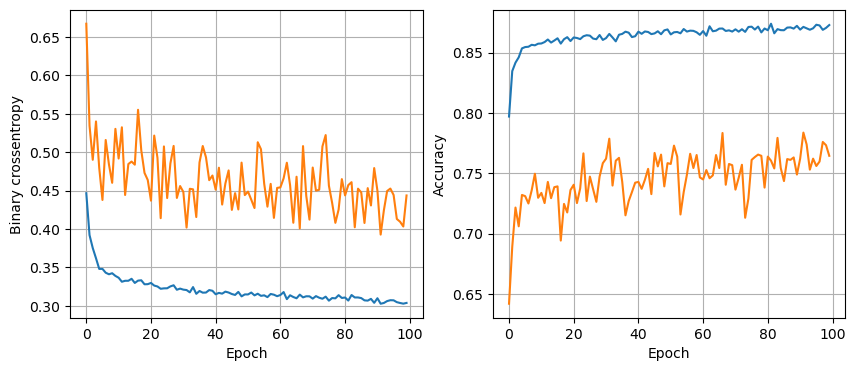

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.8796 - loss: 0.2922
32 nodes, dropout 0.2, lr 0.005, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7257 - loss: 0.5338 - val_accuracy: 0.7058 - val_loss: 0.5460
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8105 - loss: 0.4213 - val_accuracy: 0.6856 - val_loss: 0.5785
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8294 - loss: 0.3916 - val_accuracy: 0.6930 - val_loss: 0.6299
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8364 - loss: 0.3855 - val_accuracy: 0.6852 - val_loss: 0.5979
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8459 - loss: 0.3663 - val_accuracy: 0.7385 - val_loss: 0.4786
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8536 - loss: 0.3501 - val_accuracy: 0.7571 - val_loss: 0.4685
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8566 - loss: 0.3437 - val_accuracy: 0.7284 - val

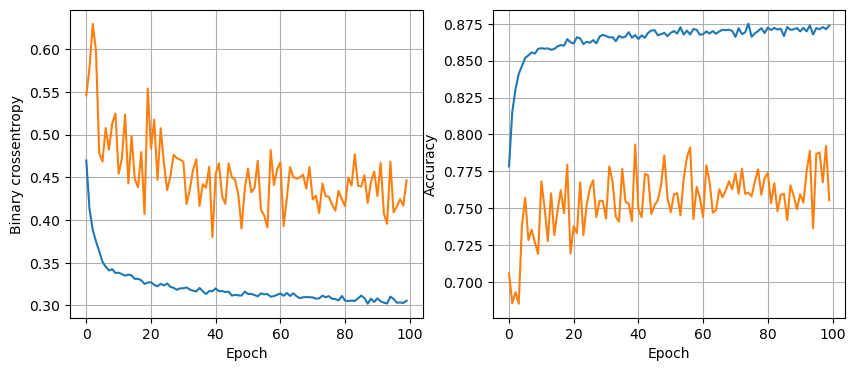

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.8760 - loss: 0.2952
32 nodes, dropout 0.2, lr 0.001, batch size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7263 - loss: 0.5397 - val_accuracy: 0.6711 - val_loss: 0.5885
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8063 - loss: 0.4282 - val_accuracy: 0.6694 - val_loss: 0.6057
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.8152 - loss: 0.4090 - val_accuracy: 0.7014 - val_loss: 0.5610
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.8285 - loss: 0.3955 - val_accuracy: 0.7139 - val_loss: 0.5289
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.8344 - loss: 0.3863 - val_accuracy: 0.7271 - val_loss: 0.5116
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.8458 - loss: 0.3689 - val_accuracy: 0.6812 - val_loss: 0.5718
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.8445 - loss: 0.3656 - v

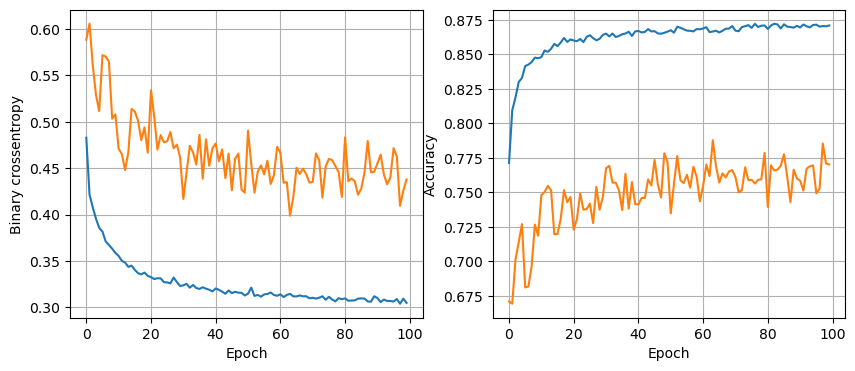

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8711 - loss: 0.2958  
32 nodes, dropout 0.2, lr 0.001, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6454 - loss: 0.6172 - val_accuracy: 0.6194 - val_loss: 0.6657
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.8081 - loss: 0.4327 - val_accuracy: 0.6795 - val_loss: 0.5784
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.8111 - loss: 0.4195 - val_accuracy: 0.6825 - val_loss: 0.5811
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.8305 - loss: 0.3951 - val_accuracy: 0.7102 - val_loss: 0.5397
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.8354 - loss: 0.3918 - val_accuracy: 0.7206 - val_loss: 0.5276
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.8392 - loss: 0.3821 - val_accuracy: 0.7088 - val_loss: 0.5389
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.8494 - loss: 0.3697 - v

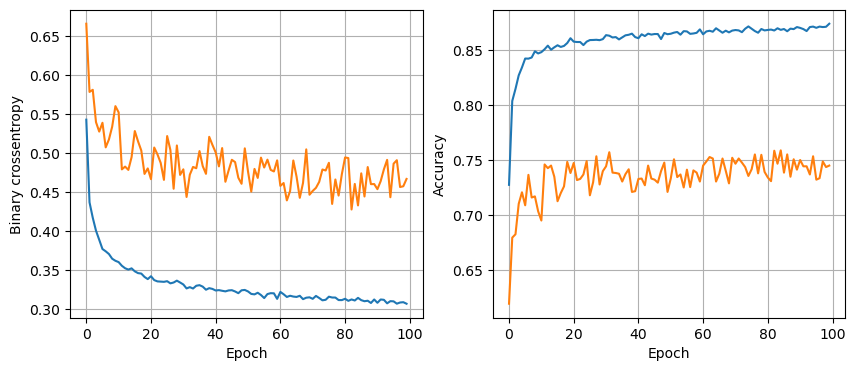

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.8781 - loss: 0.2904
32 nodes, dropout 0.2, lr 0.001, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6721 - loss: 0.6138 - val_accuracy: 0.6218 - val_loss: 0.6545
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7859 - loss: 0.4610 - val_accuracy: 0.6491 - val_loss: 0.6254
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8000 - loss: 0.4350 - val_accuracy: 0.6343 - val_loss: 0.6343
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8058 - loss: 0.4265 - val_accuracy: 0.6424 - val_loss: 0.5992
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8161 - loss: 0.4139 - val_accuracy: 0.6842 - val_loss: 0.5684
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8144 - loss: 0.4150 - val_accuracy: 0.6599 - val_loss: 0.6097
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.8149 - loss: 0.4131 - val_accuracy: 0.6957 - v

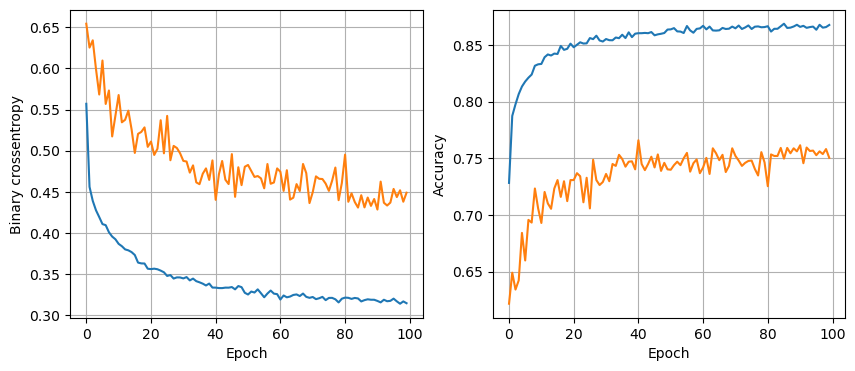

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.8717 - loss: 0.2972
64 nodes, dropout 0, lr 0.01, batch size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.7969 - loss: 0.4371 - val_accuracy: 0.7045 - val_loss: 0.5751
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.8565 - loss: 0.3449 - val_accuracy: 0.7021 - val_loss: 0.5420
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.8498 - loss: 0.3447 - val_accuracy: 0.7304 - val_loss: 0.5338
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.8591 - loss: 0.3329 - val_accuracy: 0.7274 - val_loss: 0.5063
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8651 - loss: 0.3259 - val_accuracy: 0.7540 - val_loss: 0.4790
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.8701 - loss: 0.3131 - val_accuracy: 0.7045 - val_loss: 0.5962
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.8654 - loss: 0.3207 - va

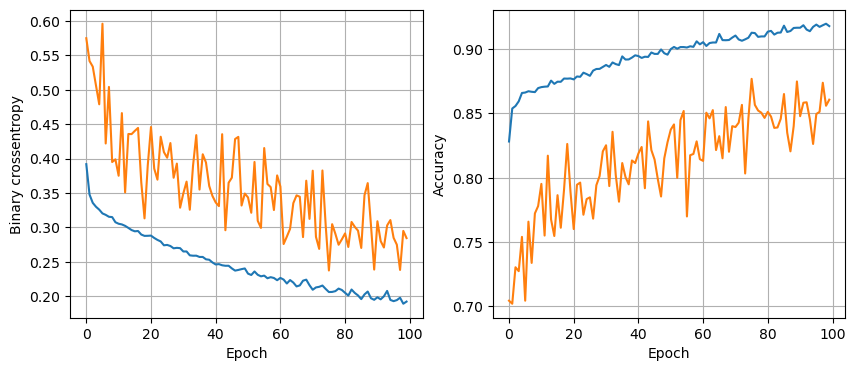

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.8608 - loss: 0.4686
64 nodes, dropout 0, lr 0.01, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8091 - loss: 0.4226 - val_accuracy: 0.7601 - val_loss: 0.4921
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.8484 - loss: 0.3489 - val_accuracy: 0.7271 - val_loss: 0.4961
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.8579 - loss: 0.3386 - val_accuracy: 0.7628 - val_loss: 0.4341
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.8634 - loss: 0.3176 - val_accuracy: 0.7291 - val_loss: 0.4900
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.8694 - loss: 0.3173 - val_accuracy: 0.8023 - val_loss: 0.3697
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8661 - loss: 0.3103 - val_accuracy: 0.7206 - val_loss: 0.5415
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.8694 - loss: 0.3105 - val_

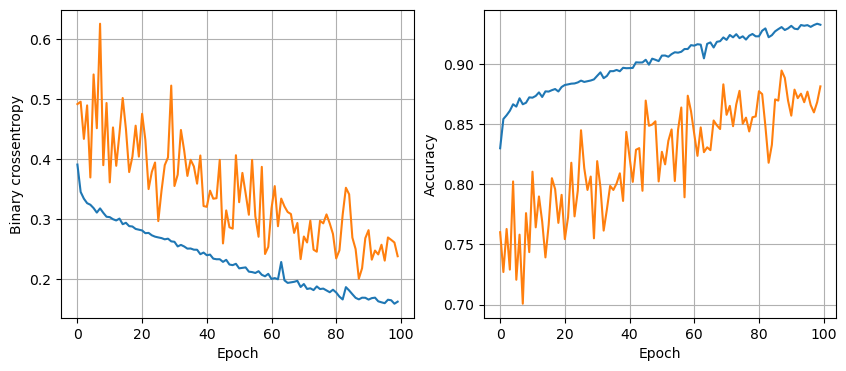

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8552 - loss: 0.4747  
64 nodes, dropout 0, lr 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8037 - loss: 0.4494 - val_accuracy: 0.6920 - val_loss: 0.6270
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.8577 - loss: 0.3457 - val_accuracy: 0.6937 - val_loss: 0.5965
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8536 - loss: 0.3394 - val_accuracy: 0.6636 - val_loss: 0.6304
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8649 - loss: 0.3242 - val_accuracy: 0.7513 - val_loss: 0.4576
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8666 - loss: 0.3177 - val_accuracy: 0.7648 - val_loss: 0.4520
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8671 - loss: 0.3150 - val_accuracy: 0.7449 - val_loss: 0.4931
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8718 - loss: 0.3049 - val_accuracy: 0.7109 - val

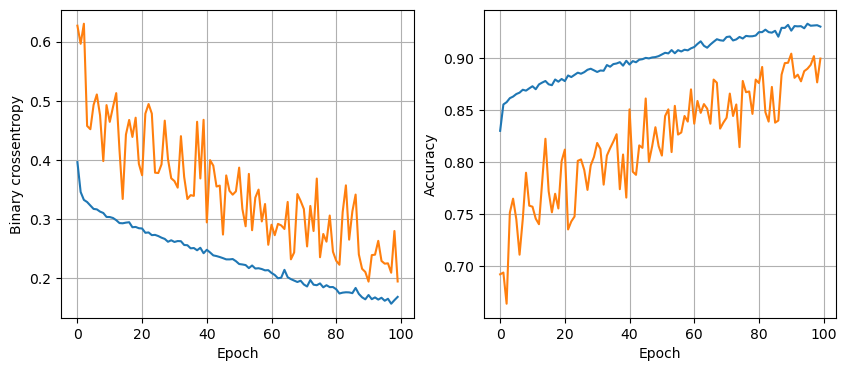

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.8496 - loss: 0.5010
64 nodes, dropout 0, lr 0.005, batch size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.7977 - loss: 0.4346 - val_accuracy: 0.7416 - val_loss: 0.4848
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.8525 - loss: 0.3504 - val_accuracy: 0.7061 - val_loss: 0.5695
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.8526 - loss: 0.3399 - val_accuracy: 0.7716 - val_loss: 0.4511
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.8597 - loss: 0.3342 - val_accuracy: 0.6987 - val_loss: 0.5583
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.8644 - loss: 0.3205 - val_accuracy: 0.7915 - val_loss: 0.4211
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.8649 - loss: 0.3123 - val_accuracy: 0.7466 - val_loss: 0.4687
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.8649 - loss: 0.3138 - v

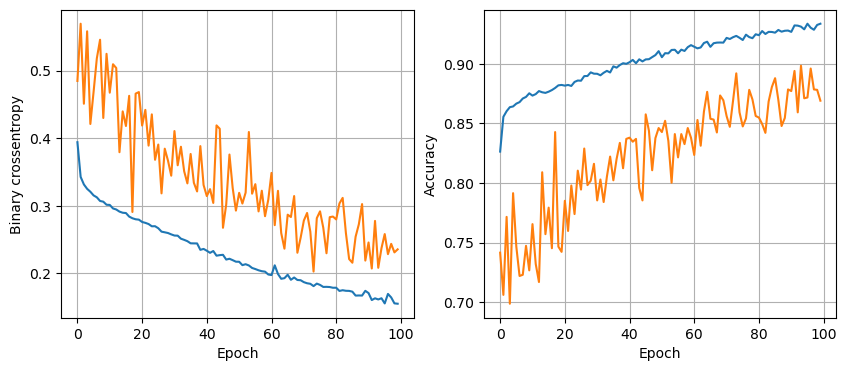

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.8620 - loss: 0.5244
64 nodes, dropout 0, lr 0.005, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7947 - loss: 0.4415 - val_accuracy: 0.7581 - val_loss: 0.4388
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.8555 - loss: 0.3443 - val_accuracy: 0.7156 - val_loss: 0.5326
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8625 - loss: 0.3334 - val_accuracy: 0.7136 - val_loss: 0.5442
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.8689 - loss: 0.3155 - val_accuracy: 0.6852 - val_loss: 0.5708
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.8616 - loss: 0.3224 - val_accuracy: 0.7325 - val_loss: 0.4939
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8607 - loss: 0.3247 - val_accuracy: 0.7770 - val_loss: 0.4351
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8651 - loss: 0.3171 - val_acc

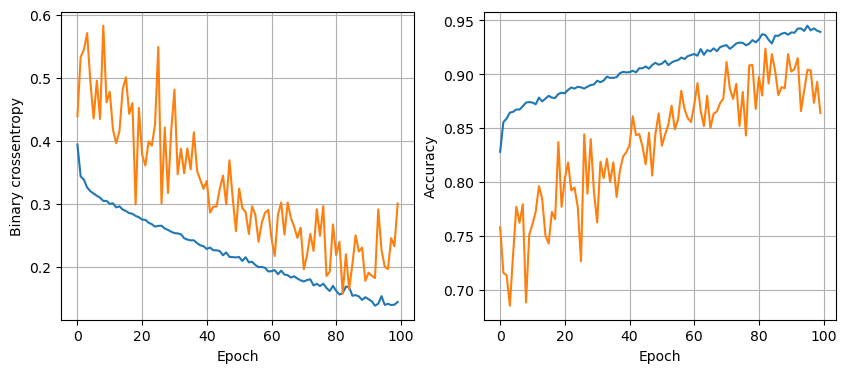

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.8617 - loss: 0.5142
64 nodes, dropout 0, lr 0.005, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7878 - loss: 0.4597 - val_accuracy: 0.7291 - val_loss: 0.5117
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8427 - loss: 0.3586 - val_accuracy: 0.7456 - val_loss: 0.4984
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.3380 - val_accuracy: 0.7844 - val_loss: 0.3937
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8632 - loss: 0.3239 - val_accuracy: 0.7304 - val_loss: 0.4995
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8656 - loss: 0.3167 - val_accuracy: 0.7460 - val_loss: 0.4932
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8631 - loss: 0.3232 - val_accuracy: 0.7335 - val_loss: 0.5377
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8585 - loss: 0.3226 - val_accuracy: 0.7220 - val

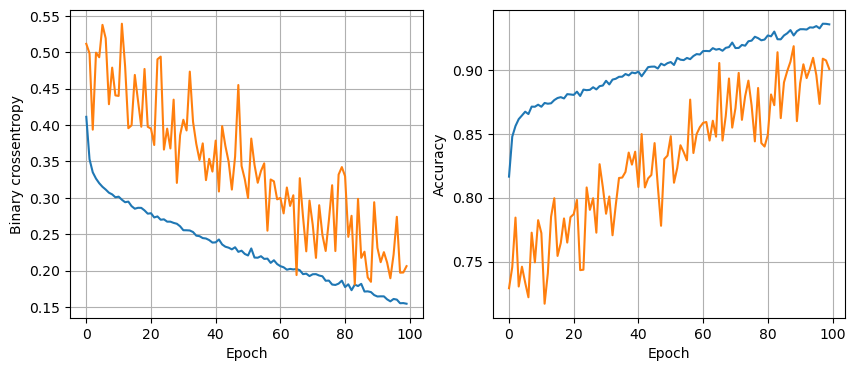

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.8537 - loss: 0.4313
64 nodes, dropout 0, lr 0.001, batch size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7779 - loss: 0.4886 - val_accuracy: 0.7129 - val_loss: 0.5423
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.8508 - loss: 0.3641 - val_accuracy: 0.7186 - val_loss: 0.5335
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.8563 - loss: 0.3444 - val_accuracy: 0.7419 - val_loss: 0.4898
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.8660 - loss: 0.3291 - val_accuracy: 0.7210 - val_loss: 0.5292
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.8611 - loss: 0.3265 - val_accuracy: 0.7642 - val_loss: 0.4633
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.8631 - loss: 0.3242 - val_accuracy: 0.7517 - val_loss: 0.4940
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.8644 - loss: 0.3196 - val

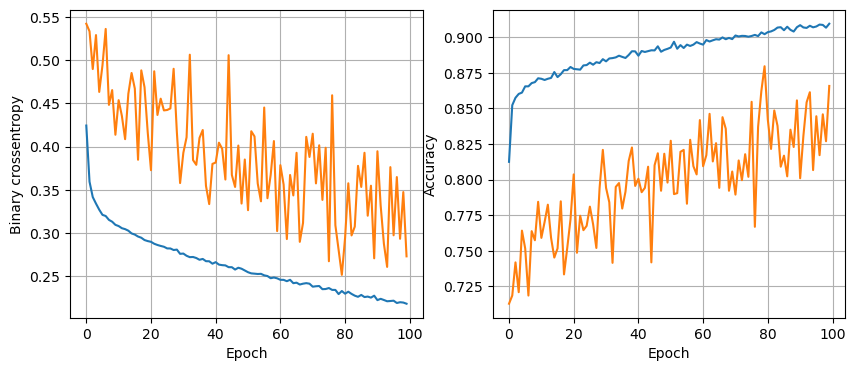

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.8584 - loss: 0.3317
64 nodes, dropout 0, lr 0.001, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7732 - loss: 0.5061 - val_accuracy: 0.7105 - val_loss: 0.5351
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.8430 - loss: 0.3737 - val_accuracy: 0.7311 - val_loss: 0.5155
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.8573 - loss: 0.3482 - val_accuracy: 0.7419 - val_loss: 0.4992
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.8587 - loss: 0.3447 - val_accuracy: 0.7554 - val_loss: 0.4878
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.8545 - loss: 0.3471 - val_accuracy: 0.7716 - val_loss: 0.4346
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.8595 - loss: 0.3331 - val_accuracy: 0.7456 - val_loss: 0.4890
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.8656 - loss: 0.3278 - val

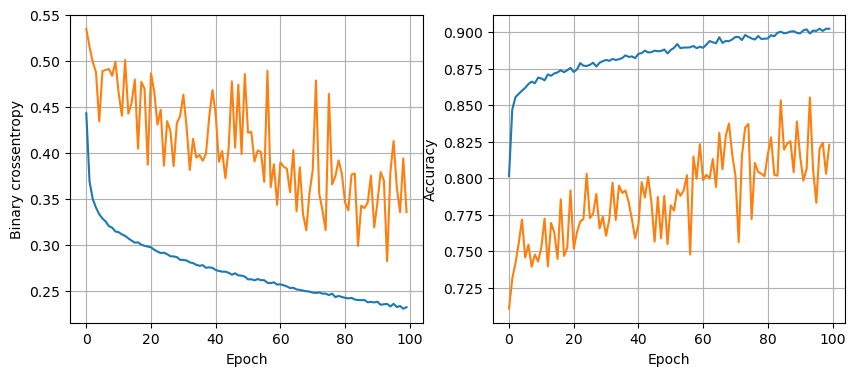

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.8686 - loss: 0.3261
64 nodes, dropout 0, lr 0.001, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6800 - loss: 0.5841 - val_accuracy: 0.6704 - val_loss: 0.6024
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8193 - loss: 0.4068 - val_accuracy: 0.7001 - val_loss: 0.5725
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8394 - loss: 0.3715 - val_accuracy: 0.7429 - val_loss: 0.5032
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8506 - loss: 0.3623 - val_accuracy: 0.7250 - val_loss: 0.5407
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8555 - loss: 0.3505 - val_accuracy: 0.7088 - val_loss: 0.5781
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8569 - loss: 0.3412 - val_accuracy: 0.7281 - val_loss: 0.5444
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.8617 - loss: 0.3381 - val_accuracy: 0.7328 - val

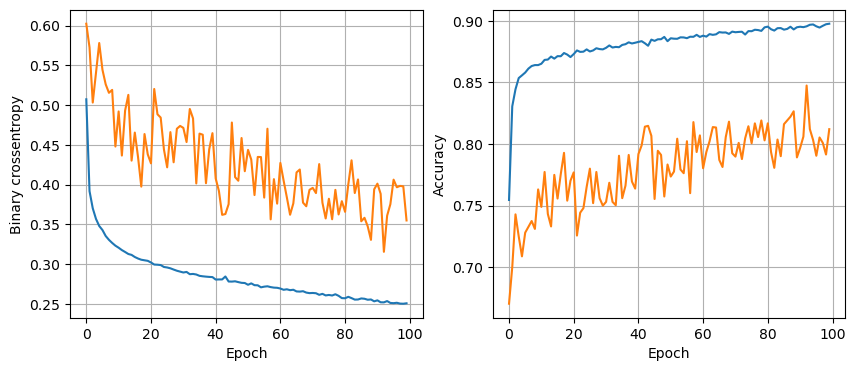

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8708 - loss: 0.3126  
64 nodes, dropout 0.2, lr 0.01, batch size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7880 - loss: 0.4535 - val_accuracy: 0.6741 - val_loss: 0.5512
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.8450 - loss: 0.3753 - val_accuracy: 0.7689 - val_loss: 0.4347
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8477 - loss: 0.3533 - val_accuracy: 0.7426 - val_loss: 0.4694
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.8444 - loss: 0.3574 - val_accuracy: 0.7163 - val_loss: 0.5145
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.8476 - loss: 0.3584 - val_accuracy: 0.7385 - val_loss: 0.4715
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.8541 - loss: 0.3435 - val_accuracy: 0.7186 - val_loss: 0.4539
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.8571 - loss: 0.3349 - va

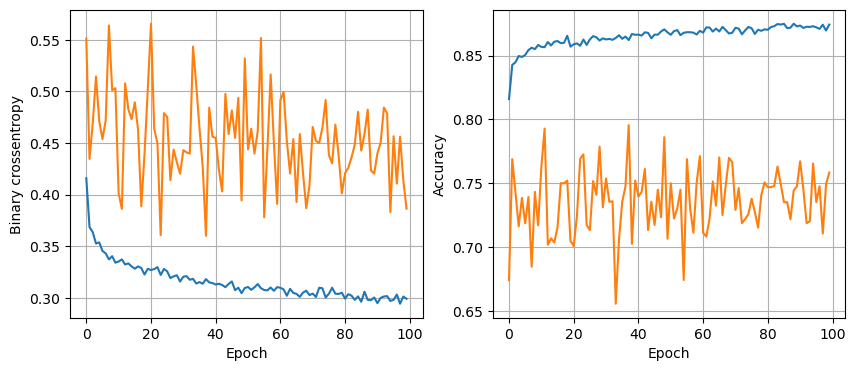

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.8864 - loss: 0.2967
64 nodes, dropout 0.2, lr 0.01, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7931 - loss: 0.4513 - val_accuracy: 0.6609 - val_loss: 0.6645
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.8396 - loss: 0.3709 - val_accuracy: 0.7591 - val_loss: 0.4818
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.8467 - loss: 0.3625 - val_accuracy: 0.7065 - val_loss: 0.5061
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.8540 - loss: 0.3485 - val_accuracy: 0.7260 - val_loss: 0.5275
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.8617 - loss: 0.3341 - val_accuracy: 0.7513 - val_loss: 0.4353
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.8553 - loss: 0.3465 - val_accuracy: 0.7038 - val_loss: 0.5333
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.8605 - loss: 0.3377 - va

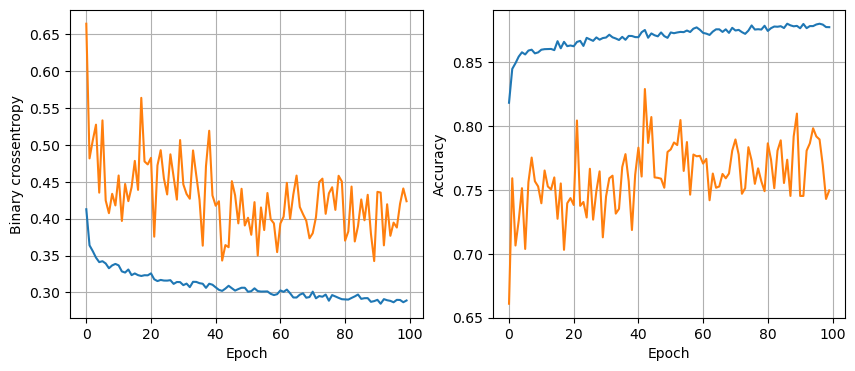

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8774 - loss: 0.2945
64 nodes, dropout 0.2, lr 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7797 - loss: 0.4727 - val_accuracy: 0.7109 - val_loss: 0.5584
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8420 - loss: 0.3631 - val_accuracy: 0.7186 - val_loss: 0.5370
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8557 - loss: 0.3429 - val_accuracy: 0.7561 - val_loss: 0.4780
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8509 - loss: 0.3474 - val_accuracy: 0.6970 - val_loss: 0.5624
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8566 - loss: 0.3461 - val_accuracy: 0.7041 - val_loss: 0.5253
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8568 - loss: 0.3370 - val_accuracy: 0.7426 - val_loss: 0.4997
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8640 - loss: 0.3367 - val_accuracy: 0.7483 - val_lo

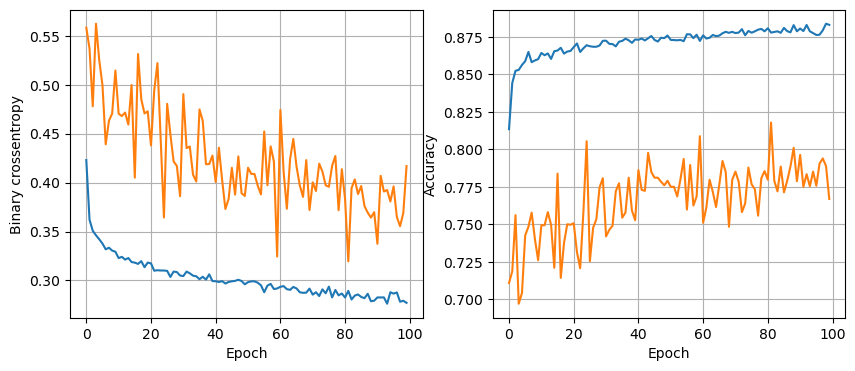

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8755 - loss: 0.2999
64 nodes, dropout 0.2, lr 0.005, batch size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - accuracy: 0.7976 - loss: 0.4470 - val_accuracy: 0.6812 - val_loss: 0.5736
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.8467 - loss: 0.3630 - val_accuracy: 0.7520 - val_loss: 0.4508
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.8521 - loss: 0.3498 - val_accuracy: 0.7760 - val_loss: 0.4230
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.8511 - loss: 0.3423 - val_accuracy: 0.7605 - val_loss: 0.4547
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.8535 - loss: 0.3504 - val_accuracy: 0.7227 - val_loss: 0.5474
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.8620 - loss: 0.3229 - val_accuracy: 0.7780 - val_loss: 0.4147
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.8573 - loss: 0.3323 - v

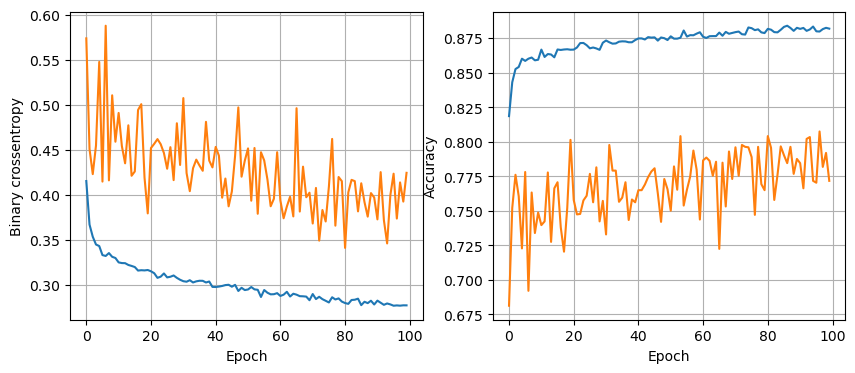

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.8821 - loss: 0.2964
64 nodes, dropout 0.2, lr 0.005, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7844 - loss: 0.4687 - val_accuracy: 0.7659 - val_loss: 0.4241
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.8377 - loss: 0.3811 - val_accuracy: 0.6852 - val_loss: 0.5377
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.8480 - loss: 0.3589 - val_accuracy: 0.7325 - val_loss: 0.4535
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.8531 - loss: 0.3439 - val_accuracy: 0.7291 - val_loss: 0.5029
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.8592 - loss: 0.3407 - val_accuracy: 0.7372 - val_loss: 0.5017
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8610 - loss: 0.3297 - val_accuracy: 0.7564 - val_loss: 0.4524
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.8601 - loss: 0.3349 - v

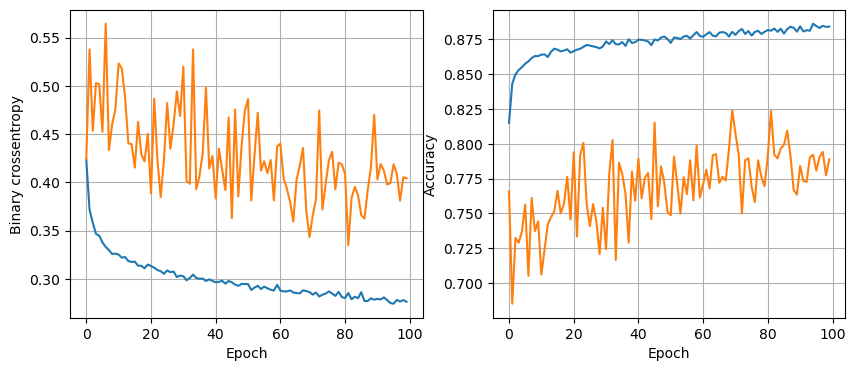

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.8795 - loss: 0.2823
64 nodes, dropout 0.2, lr 0.005, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7653 - loss: 0.4862 - val_accuracy: 0.6630 - val_loss: 0.6390
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8296 - loss: 0.3891 - val_accuracy: 0.7061 - val_loss: 0.5572
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8506 - loss: 0.3597 - val_accuracy: 0.7149 - val_loss: 0.5320
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8472 - loss: 0.3539 - val_accuracy: 0.7352 - val_loss: 0.4837
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8502 - loss: 0.3446 - val_accuracy: 0.7358 - val_loss: 0.4884
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8566 - loss: 0.3402 - val_accuracy: 0.7392 - val_loss: 0.4790
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8564 - loss: 0.3379 - val_accuracy: 0.7183 - val

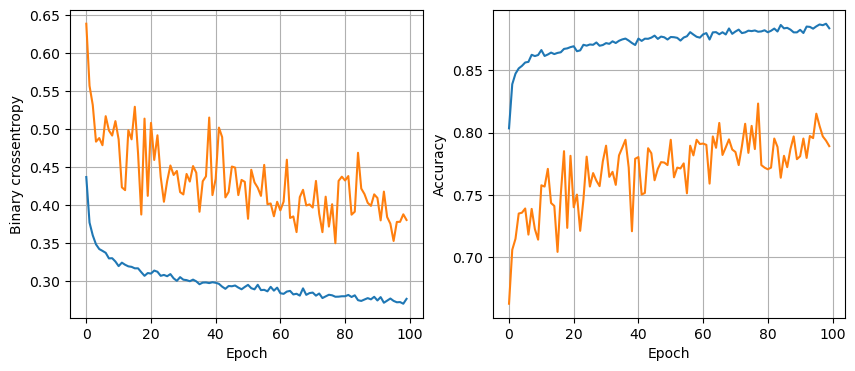

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.8753 - loss: 0.2892
64 nodes, dropout 0.2, lr 0.001, batch size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - accuracy: 0.7295 - loss: 0.5266 - val_accuracy: 0.6872 - val_loss: 0.5620
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.8287 - loss: 0.3976 - val_accuracy: 0.7142 - val_loss: 0.5608
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.8406 - loss: 0.3831 - val_accuracy: 0.7331 - val_loss: 0.5068
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.8445 - loss: 0.3635 - val_accuracy: 0.7500 - val_loss: 0.4902
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.8471 - loss: 0.3603 - val_accuracy: 0.7088 - val_loss: 0.5617
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.8574 - loss: 0.3423 - val_accuracy: 0.6785 - val_loss: 0.5832
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.8518 - loss: 0.3538 -

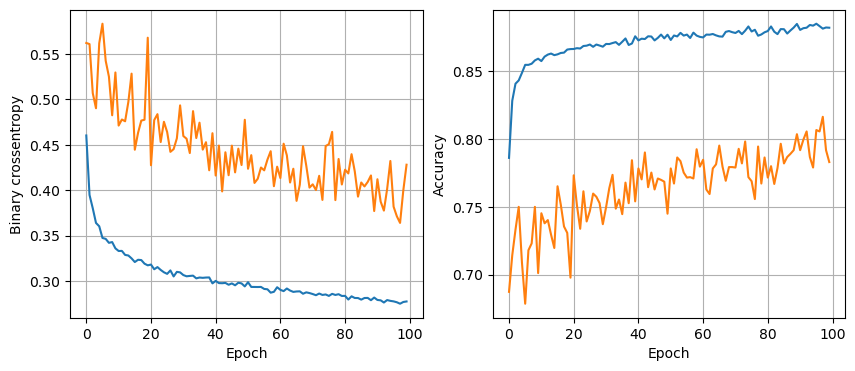

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.8809 - loss: 0.2880
64 nodes, dropout 0.2, lr 0.001, batch size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7283 - loss: 0.5513 - val_accuracy: 0.6623 - val_loss: 0.5836
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.8129 - loss: 0.4206 - val_accuracy: 0.6926 - val_loss: 0.5677
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.8210 - loss: 0.3986 - val_accuracy: 0.6754 - val_loss: 0.6239
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.8303 - loss: 0.3869 - val_accuracy: 0.6842 - val_loss: 0.6113
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.8366 - loss: 0.3791 - val_accuracy: 0.7055 - val_loss: 0.5512
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.8396 - loss: 0.3726 - val_accuracy: 0.7453 - val_loss: 0.4991
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8496 - loss: 0.3597 - val

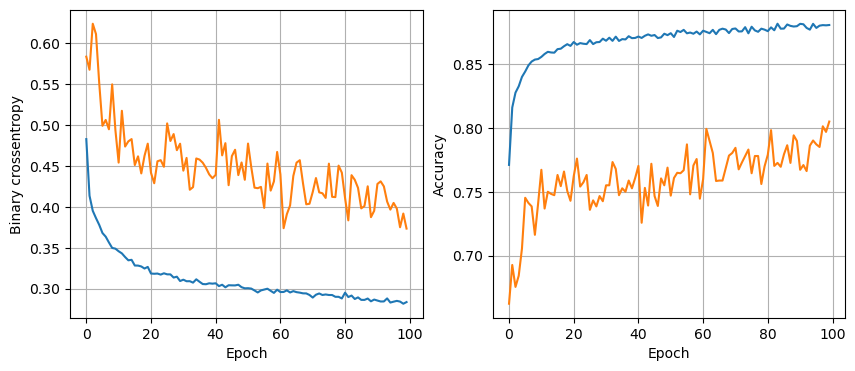

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.8719 - loss: 0.2953
64 nodes, dropout 0.2, lr 0.001, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6396 - loss: 0.6124 - val_accuracy: 0.6012 - val_loss: 0.6512
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7982 - loss: 0.4374 - val_accuracy: 0.6748 - val_loss: 0.5581
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8083 - loss: 0.4174 - val_accuracy: 0.6576 - val_loss: 0.6125
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8295 - loss: 0.3917 - val_accuracy: 0.7308 - val_loss: 0.5104
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8370 - loss: 0.3776 - val_accuracy: 0.7284 - val_loss: 0.5262
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8433 - loss: 0.3674 - val_accuracy: 0.7179 - val_loss: 0.5401
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8492 - loss: 0.3619 - val_accuracy: 0.7250 - val

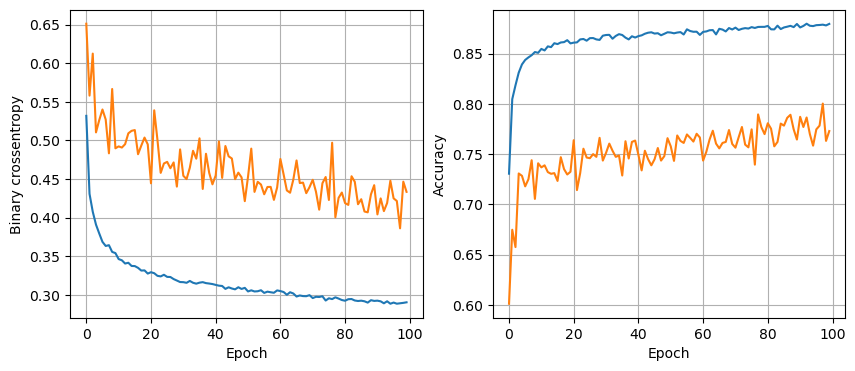

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.8835 - loss: 0.2858


In [75]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [76]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1361
           1       0.88      0.95      0.91      2443

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

